In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("D:/My/Data Analyst/Pangan_jateng_analysis/data/processed/pangan_jateng_2019_2023.csv")


In [2]:
df.columns


Index(['tahun_data', 'komoditas_pangan', 'bulan_data', 'ketersdiaan_data',
       'kebutuhan_data', 'deviasi_data'],
      dtype='object')

In [3]:
df['bulan_data'] = df['bulan_data'].str.lower()

bulan_map = {
    'januari':1, 'februari':2, 'maret':3, 'april':4,
    'mei':5, 'juni':6, 'juli':7, 'agustus':8,
    'september':9, 'oktober':10, 'november':11, 'desember':12
}

df['bulan_num'] = df['bulan_data'].map(bulan_map)
df['date'] = pd.to_datetime(dict(year=df['tahun_data'], month=df['bulan_num'], day=1))


In [9]:
df['komoditas_pangan'].value_counts()


komoditas_pangan
DAGING AYAM             36
TELUR                   36
JAGUNG                  36
KEDELAI                 36
BAWANG MERAH            36
BAWANG PUTIH            36
BERAS                   36
MINYAK GORENG           36
GULA KONSUMSI           24
DAGING SAPI             24
CABAI BESAR             24
CABAI RAWIT             24
CABE BESAR              12
CABE RAWIT              12
DAGING TOTAL            12
DAGING SAPI / KERBAU    12
GULA PASIR              12
Jagung                   2
Padi                     2
Telur                    2
Kedelai                  2
K. Tanah                 2
Bawang merah             2
Cabai rawit              2
Cabai merah              2
K. Hijau                 2
Ubi Kayu                 2
Ubi Jalar                2
Daging                   2
Gula                     1
Garam                    1
Susu                     1
Susu                     1
Ikan                     1
Garam                    1
Gula                     1
Ikan       

In [11]:
df['komoditas_pangan'] = (
    df['komoditas_pangan']
    .astype(str)
    .str.strip()
    .str.lower()
)

df['komoditas_pangan'].value_counts()


komoditas_pangan
bawang merah            38
kedelai                 38
telur                   38
jagung                  38
beras                   36
minyak goreng           36
daging ayam             36
bawang putih            36
cabai rawit             26
gula konsumsi           24
daging sapi             24
cabai besar             24
daging sapi / kerbau    12
daging total            12
cabe rawit              12
cabe besar              12
gula pasir              12
garam                    2
cabai merah              2
ikan                     2
susu                     2
daging                   2
gula                     2
ubi jalar                2
ubi kayu                 2
k. hijau                 2
k. tanah                 2
padi                     2
Name: count, dtype: int64

### MEMBUAT PREDIKSI TIME SERIES KOMODITAS "BERAS" ###

In [12]:
komoditas = "beras"
df_k = df[df['komoditas_pangan'] == komoditas]


In [13]:
ts = df_k.groupby('date').agg({
    'ketersdiaan_data':'sum',
    'kebutuhan_data':'sum'
}).reset_index()


In [14]:
ts['selisih'] = ts['ketersdiaan_data'] - ts['kebutuhan_data']
ts['time_index'] = np.arange(len(ts))


In [15]:
from sklearn.linear_model import LinearRegression

X = ts[['time_index']]
y = ts['ketersdiaan_data']

model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [16]:
future_index = np.arange(len(ts), len(ts)+6)
future_df = pd.DataFrame({'time_index': future_index})

future_df['prediksi_ketersediaan'] = model.predict(future_df)


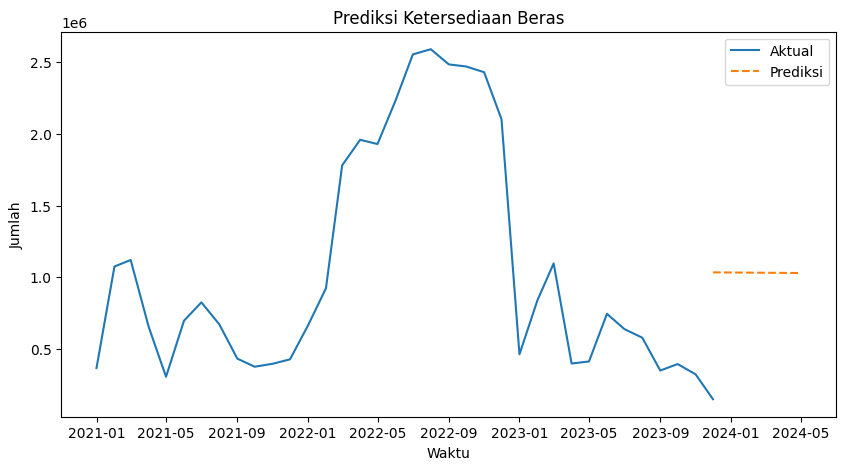

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(ts['date'], ts['ketersdiaan_data'], label='Aktual')
plt.plot(pd.date_range(ts['date'].max(), periods=6, freq='MS'),
         future_df['prediksi_ketersediaan'], 
         linestyle='--', label='Prediksi')

plt.title(f'Prediksi Ketersediaan {komoditas.capitalize()}')
plt.xlabel('Waktu')
plt.ylabel('Jumlah')
plt.legend()
plt.show()


### MEMBUAT PREDIKSI TIME SERIES KOMODITAS "TELUR" ###

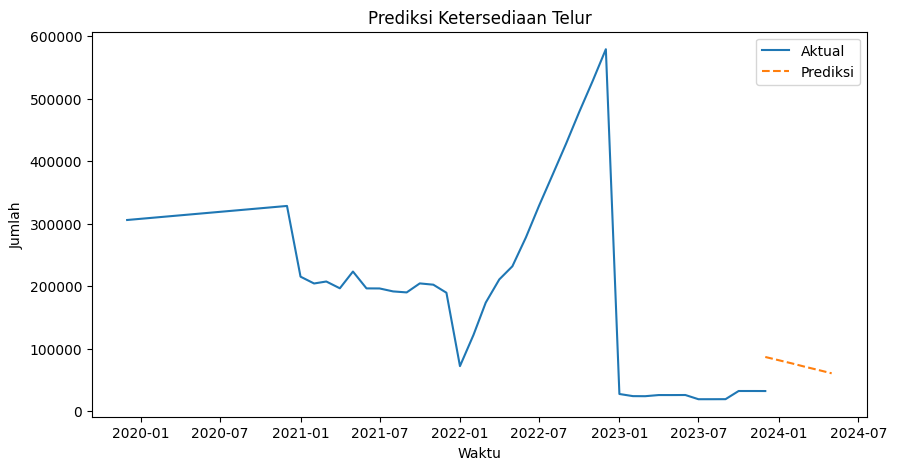

In [19]:
komoditas = "telur"
df_k = df[df['komoditas_pangan'] == komoditas]

ts = df_k.groupby('date').agg({
    'ketersdiaan_data':'sum',
    'kebutuhan_data':'sum'
}).reset_index()

ts['selisih'] = ts['ketersdiaan_data'] - ts['kebutuhan_data']
ts['time_index'] = np.arange(len(ts))

from sklearn.linear_model import LinearRegression

X = ts[['time_index']]
y = ts['ketersdiaan_data']

model = LinearRegression()
model.fit(X, y)

future_index = np.arange(len(ts), len(ts)+6)
future_df = pd.DataFrame({'time_index': future_index})

future_df['prediksi_ketersediaan'] = model.predict(future_df)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(ts['date'], ts['ketersdiaan_data'], label='Aktual')
plt.plot(pd.date_range(ts['date'].max(), periods=6, freq='MS'),
         future_df['prediksi_ketersediaan'], 
         linestyle='--', label='Prediksi')

plt.title(f'Prediksi Ketersediaan {komoditas.capitalize()}')
plt.xlabel('Waktu')
plt.ylabel('Jumlah')
plt.legend()
plt.show()



### MEMBUAT PREDIKSI TIME SERIES KOMODITAS "DAGING AYAM" ###

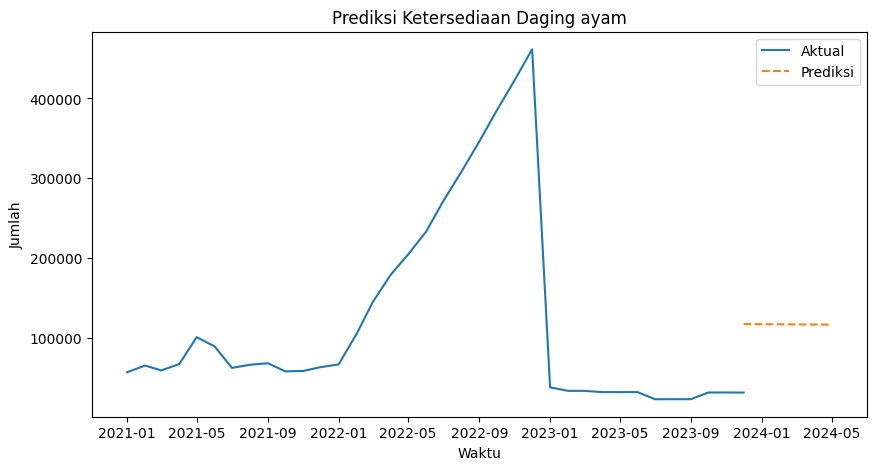

In [20]:

komoditas = "daging ayam"
df_k = df[df['komoditas_pangan'] == komoditas]

ts = df_k.groupby('date').agg({
    'ketersdiaan_data':'sum',
    'kebutuhan_data':'sum'
}).reset_index()

ts['selisih'] = ts['ketersdiaan_data'] - ts['kebutuhan_data']
ts['time_index'] = np.arange(len(ts))

from sklearn.linear_model import LinearRegression

X = ts[['time_index']]
y = ts['ketersdiaan_data']

model = LinearRegression()
model.fit(X, y)

future_index = np.arange(len(ts), len(ts)+6)
future_df = pd.DataFrame({'time_index': future_index})

future_df['prediksi_ketersediaan'] = model.predict(future_df)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(ts['date'], ts['ketersdiaan_data'], label='Aktual')
plt.plot(pd.date_range(ts['date'].max(), periods=6, freq='MS'),
         future_df['prediksi_ketersediaan'], 
         linestyle='--', label='Prediksi')

plt.title(f'Prediksi Ketersediaan {komoditas.capitalize()}')
plt.xlabel('Waktu')
plt.ylabel('Jumlah')
plt.legend()
plt.show()



### MEMBUAT PREDIKSI TIME SERIES KOMODITAS "BAWANG MERAH" ###

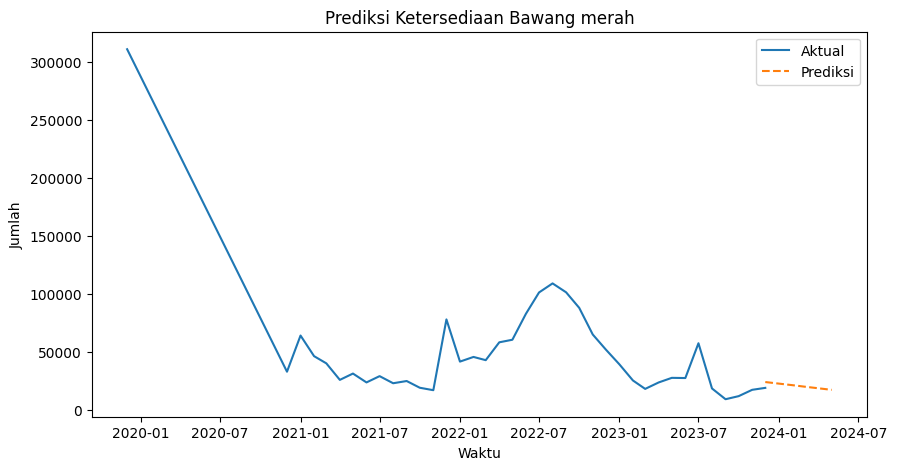

In [21]:

komoditas = "bawang merah"
df_k = df[df['komoditas_pangan'] == komoditas]

ts = df_k.groupby('date').agg({
    'ketersdiaan_data':'sum',
    'kebutuhan_data':'sum'
}).reset_index()

ts['selisih'] = ts['ketersdiaan_data'] - ts['kebutuhan_data']
ts['time_index'] = np.arange(len(ts))

from sklearn.linear_model import LinearRegression

X = ts[['time_index']]
y = ts['ketersdiaan_data']

model = LinearRegression()
model.fit(X, y)

future_index = np.arange(len(ts), len(ts)+6)
future_df = pd.DataFrame({'time_index': future_index})

future_df['prediksi_ketersediaan'] = model.predict(future_df)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(ts['date'], ts['ketersdiaan_data'], label='Aktual')
plt.plot(pd.date_range(ts['date'].max(), periods=6, freq='MS'),
         future_df['prediksi_ketersediaan'], 
         linestyle='--', label='Prediksi')

plt.title(f'Prediksi Ketersediaan {komoditas.capitalize()}')
plt.xlabel('Waktu')
plt.ylabel('Jumlah')
plt.legend()
plt.show()

